In [1]:
# !pip install tensorflow==2.10.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("TensorFlow:", tf.__version__)


NumPy: 1.26.4
Pandas: 2.2.2
TensorFlow: 2.10.1


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers

# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.datasets import mnist
# import keras
# from keras.models import Sequential
# from keras.layers.core import Dense,Activation,Dropout
# from keras.datasets import mnist
# from keras.utils.np_utils import to_categorical
# from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
#Digital MNIST dataset
(x_train_digit, y_train_digit), (x_test_digit, y_test_digit)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

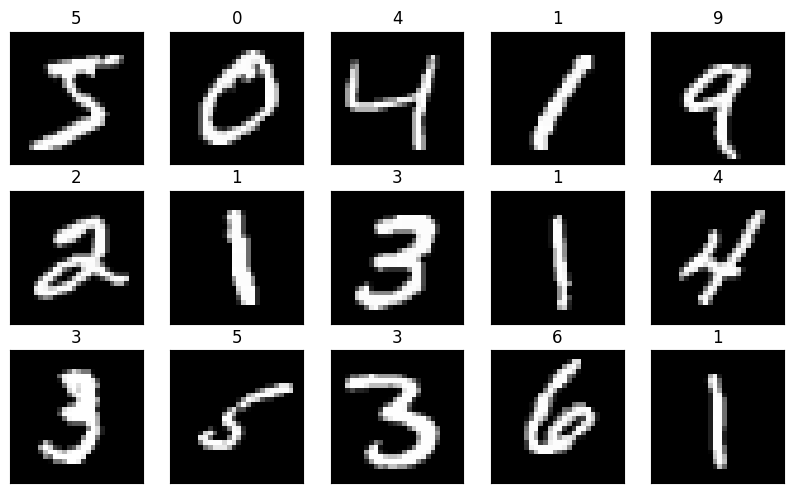

In [7]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))

for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i], cmap='gray')
    plt.title(y_train_digit[i])

plt.show()


In [8]:
#shape is in 3D
x_train_digit.shape

(60000, 28, 28)

In [10]:
#converting to 2D
x_train_digit=x_train_digit.reshape(60000, 784)
x_test_digit=x_test_digit.reshape(10000, 784)

In [11]:
x_train_digit.shape

(60000, 784)

In [12]:
y_train_digit.shape

(60000,)

In [13]:
#Encoding Digit MNIST Labels
y_train_digit=to_categorical(y_train_digit, num_classes=10)
y_test_digit=to_categorical(y_test_digit, num_classes=10)

In [14]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#Creating  base neural network
model=keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid'),
])    

In [18]:
#param_number=output_channel_number*(input_channel_number+1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                        

In [20]:
#compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
    

In [22]:
history=model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(x_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 7s 9ms/step - loss: 0.3751 - accuracy: 0.8940 - val_loss: 0.1419 - val_accuracy: 0.9560
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1488 - accuracy: 0.9554 - val_loss: 0.0978 - val_accuracy: 0.9699
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.0872 - val_accuracy: 0.9734
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0847 - accuracy: 0.9749 - val_loss: 0.0841 - val_accuracy: 0.9752
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0693 - accuracy: 0.9786 - val_loss: 0.0875 - val_accuracy: 0.9749
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0843 - val_accuracy: 0.9758
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0873 - val_accuracy: 0.9738
Epoch 

In [23]:
#Predicting the label-DIGIT
y_predict=model.predict(x_test_digit)

313/313 [==============================] - 1s 3ms/step


In [24]:
y_predict[0]

array([3.79603868e-03, 6.97103202e-01, 1.07019417e-01, 2.46807382e-01,
       1.72791928e-02, 1.03496155e-02, 5.03194815e-06, 9.99998689e-01,
       2.74393102e-03, 2.06086650e-01], dtype=float32)

In [25]:
y_predicts=np.argmax(y_predict, axis=1) #Here we get the index of maximum value in the encoded vector

In [26]:
y_predict

array([[3.79603868e-03, 6.97103202e-01, 1.07019417e-01, ...,
        9.99998689e-01, 2.74393102e-03, 2.06086650e-01],
       [1.23726189e-01, 9.44819570e-01, 9.99999762e-01, ...,
        8.40503514e-01, 3.29748821e-03, 7.47702984e-07],
       [1.80461223e-03, 9.99997854e-01, 1.47336498e-01, ...,
        4.67539698e-01, 3.46141785e-01, 2.07842747e-03],
       ...,
       [1.64338329e-04, 2.16355741e-01, 3.00392602e-03, ...,
        7.41361260e-01, 8.81941814e-04, 9.35894430e-01],
       [7.20031112e-02, 1.40644265e-02, 5.33404236e-04, ...,
        7.21609071e-02, 8.42449784e-01, 8.84180365e-04],
       [1.19217701e-01, 6.56777015e-03, 7.97266606e-04, ...,
        5.09683799e-04, 2.21047434e-03, 2.70127144e-04]], dtype=float32)

In [28]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [29]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval, y_predicts)
sns.set_theme(style="deep")
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size':15},linwidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()
           

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval, y_predicts))

In [ ]:
print(history.history.keys())

In [ ]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

In [ ]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

In [ ]:
#tf.expand_dims(x_test_digit[0])
y_predict_single=model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) #Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [ ]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()